# P问题


## 非线性最小二乘

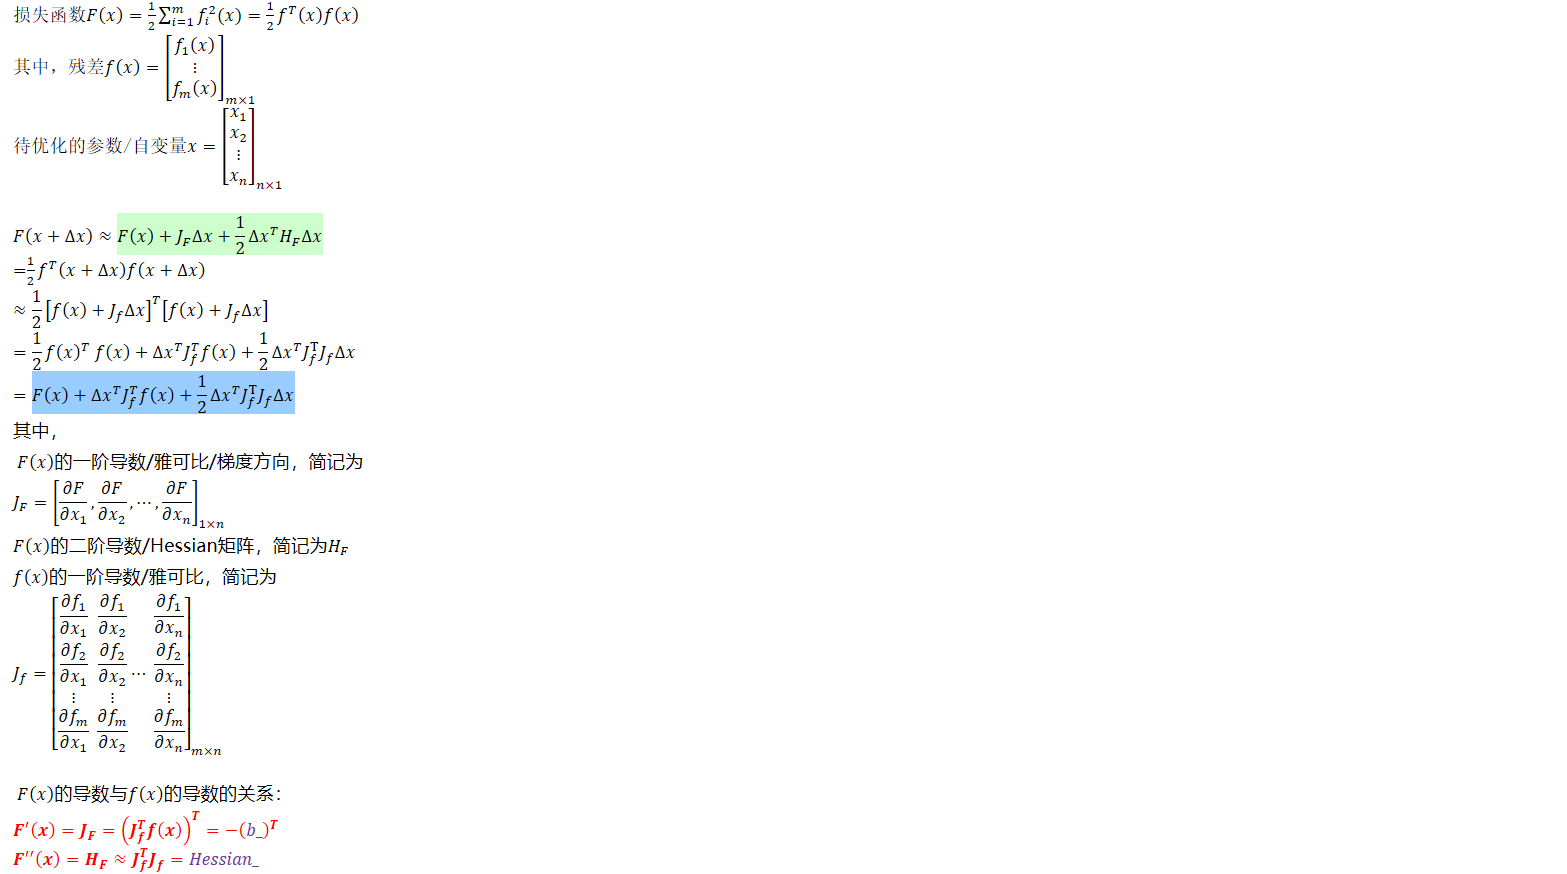

### 梯度法/最速下降法/Steepest Descent method/gradient method
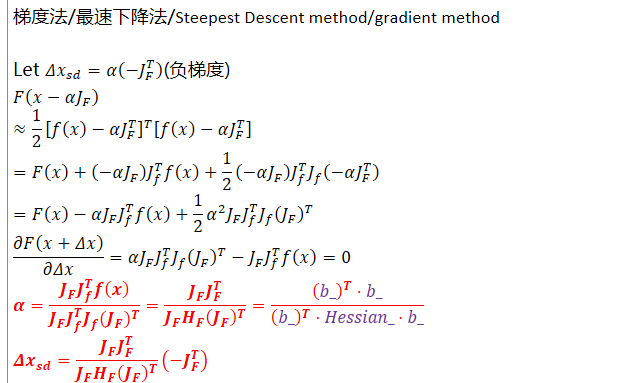

### 牛顿法/Newton's method
$min_{\Delta x} F(x)+J_F \Delta x+\frac{1}{2}\Delta x^T H_F\Delta x $
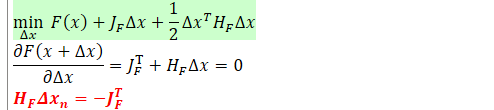

### 阻尼法/damped Newton method

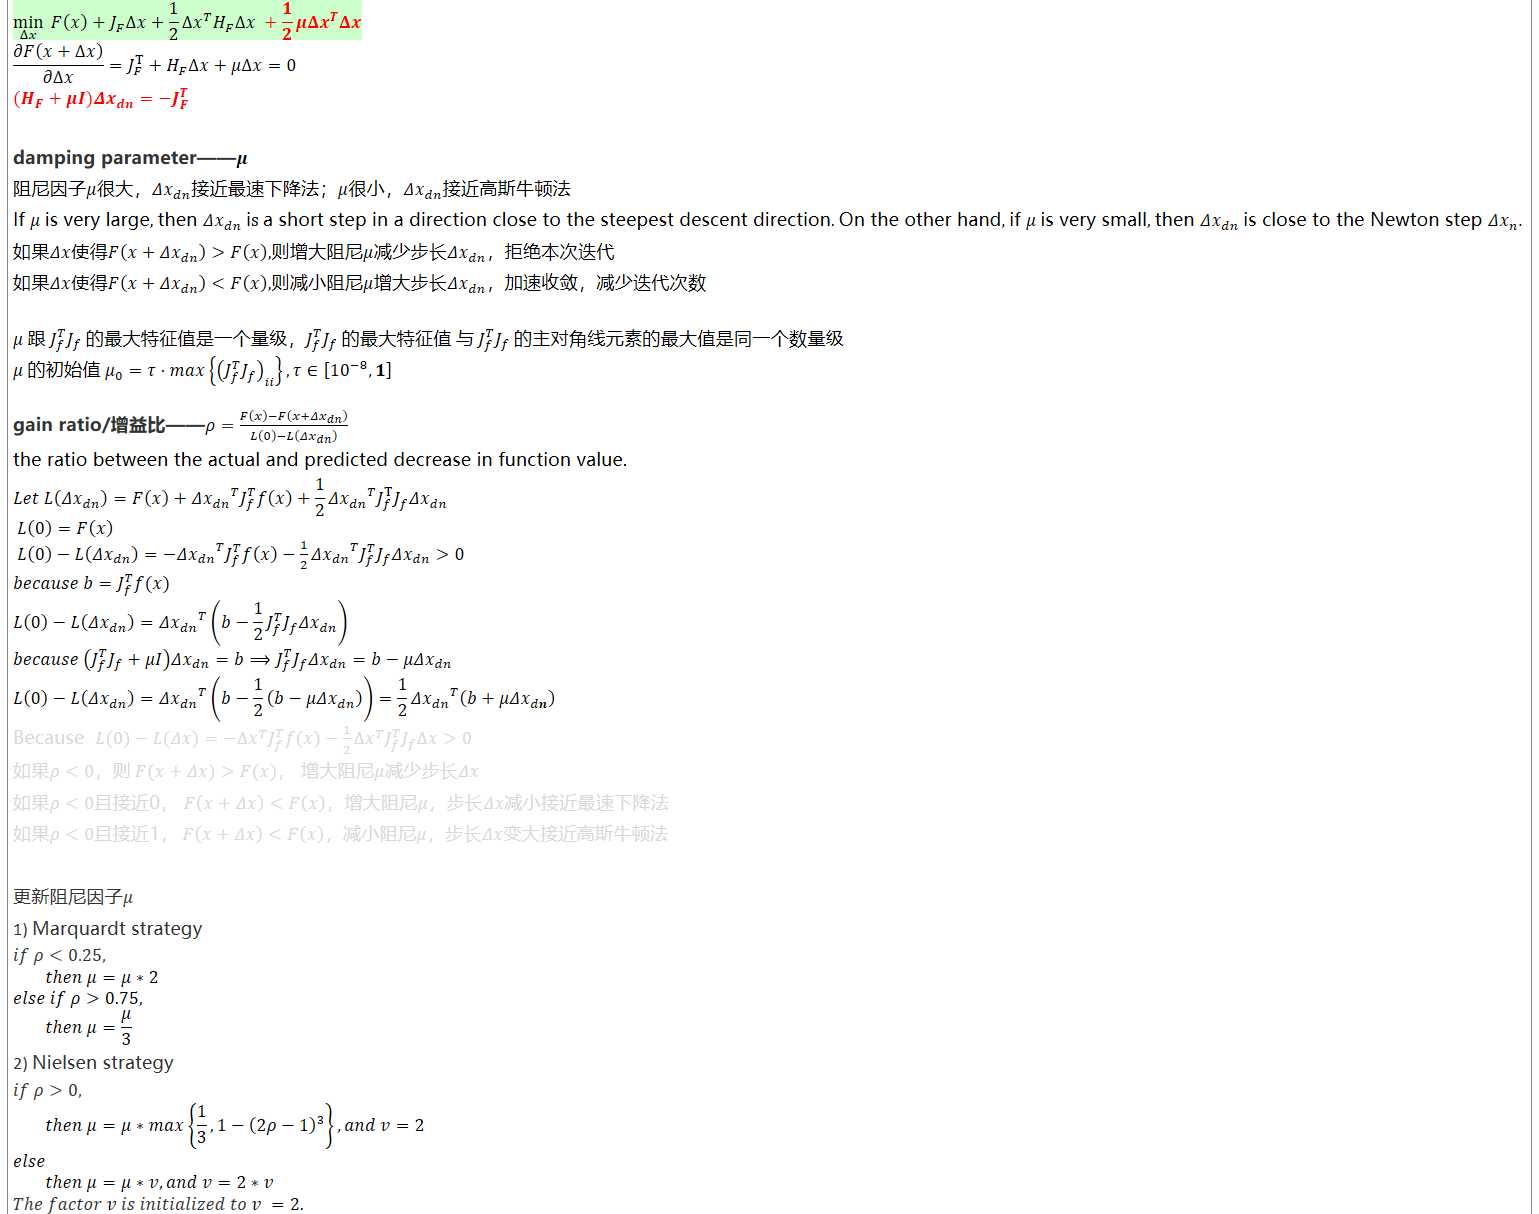


### 高斯牛顿法/Gauss-Newton iteration method
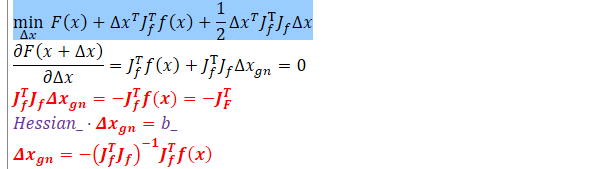

### LM算法
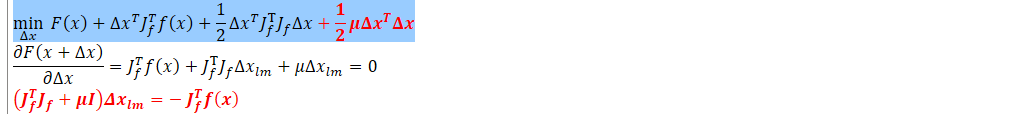

### Powell's Dog Leg Method

如果牛顿法的$\Delta x$小于信赖域，取牛顿法的$\Delta x$  
如果梯度法和牛顿法的$\Delta x$都大于信赖域，取单位梯度$\Delta x$*信赖域  
如果梯度法的$\Delta x <$信赖域 且 牛顿法的$\Delta x >$信赖域，取这个向量的终点连线与信赖域单位圆的交点  

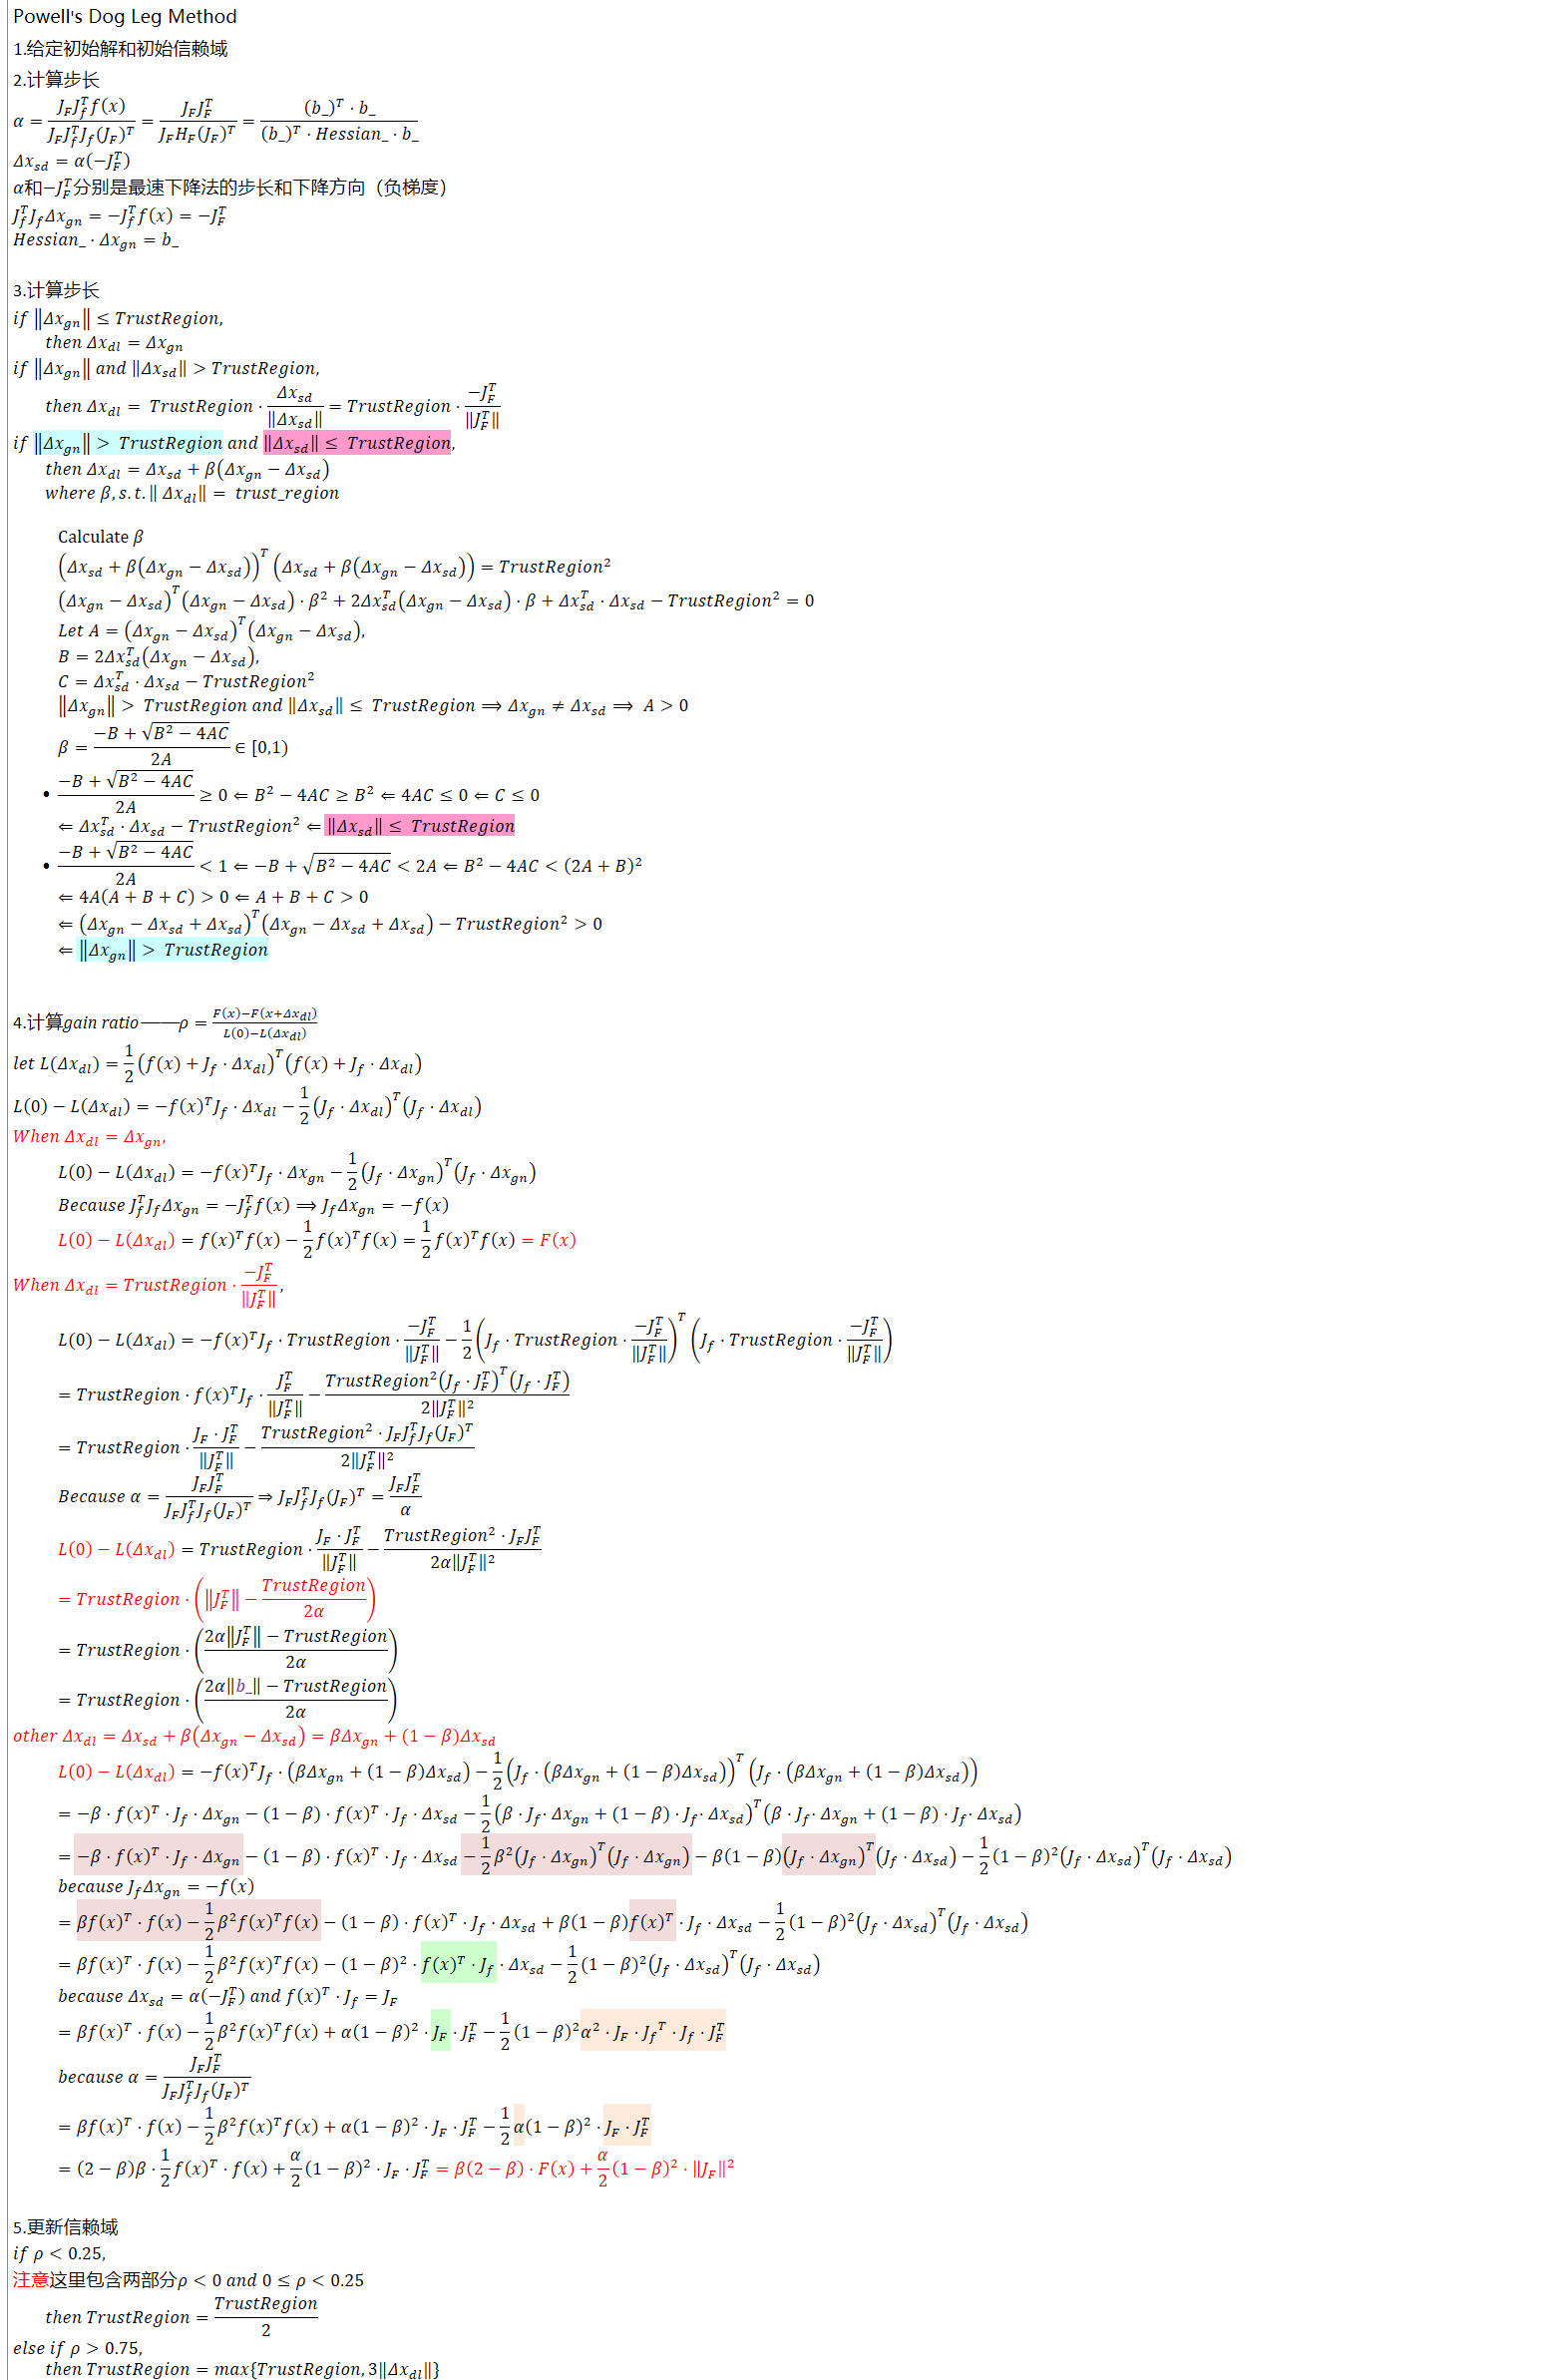


# 最短路问题/Shortest Path Problem

## 全局最短路
算法|无权图|正权图|无负权环的负权图|单源|多源|稠密图(邻接矩阵)|稀疏图(邻接表)
:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:
广度优先|√|×
basic Dijkstra|√|√|×|√|×|√|√
堆优化的Dijkstra|√|√|×|√|×|√|√
Floyd|√|√|√|√|√|√|√
Bellman-Ford|√|√|√|√|×| |√
SPFA|√|√|√|√|×| |√

### 无权图, 负权边 & 负权环
#### 无权图，边权值全为1的图
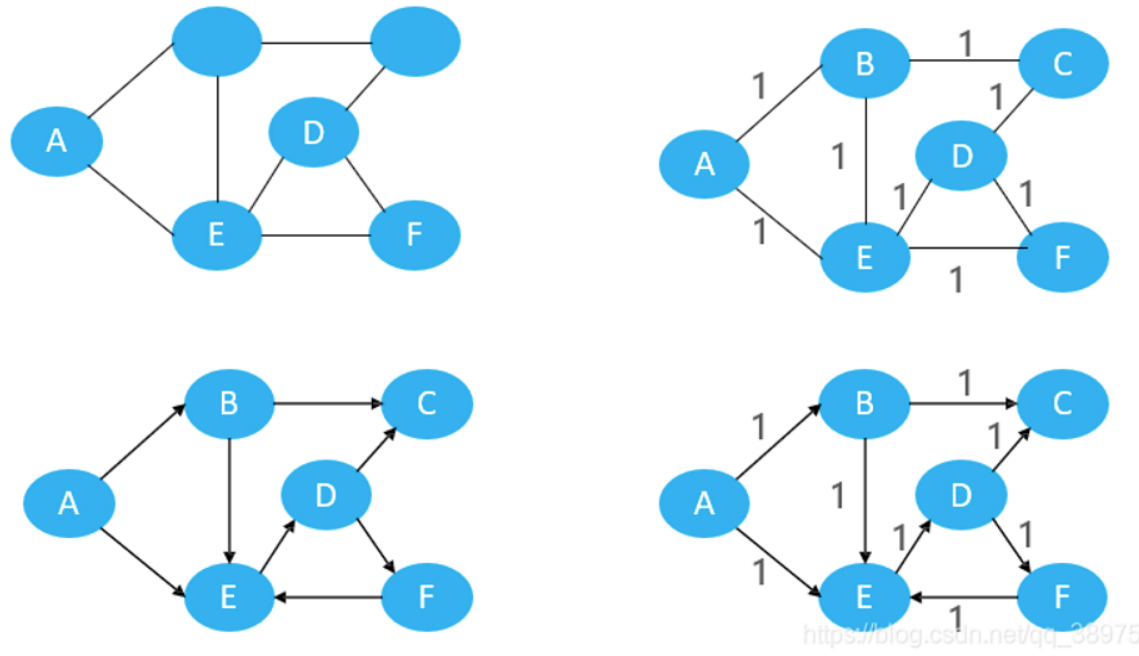

#### 有负权边，但无负权环的图，存在最短路
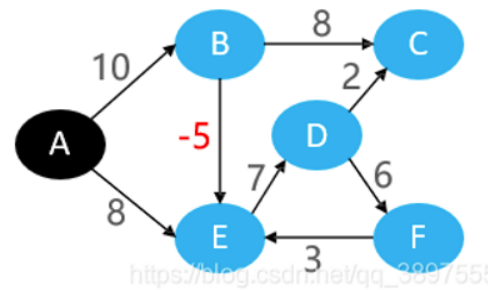

#### 有负权环的图，不存在最短路
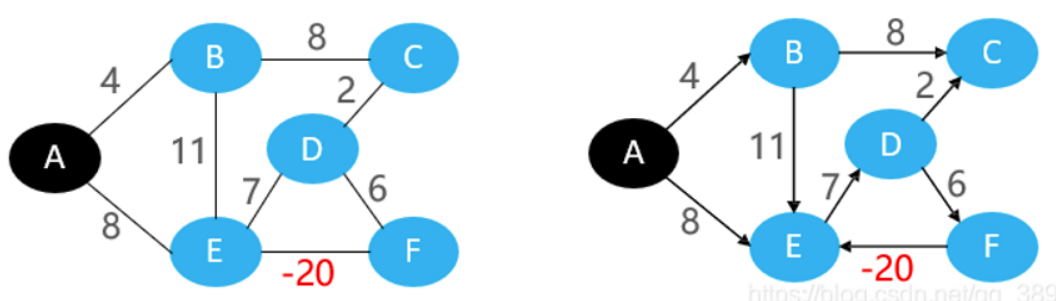

### 松弛
https://www.zhihu.com/question/306895915/answer/575840206  
https://blog.csdn.net/dimaishu7553/article/details/102343021  

### 邻接表(Adjacency List) & 邻接矩阵(Adjacency Matrix)

注意: 邻接表定位时使用顶点的id,邻接矩阵定位时使用顶点在矩阵中的index  
演示：https://www.cs.usfca.edu/~galles/visualization/Dijkstra.html  
Example:
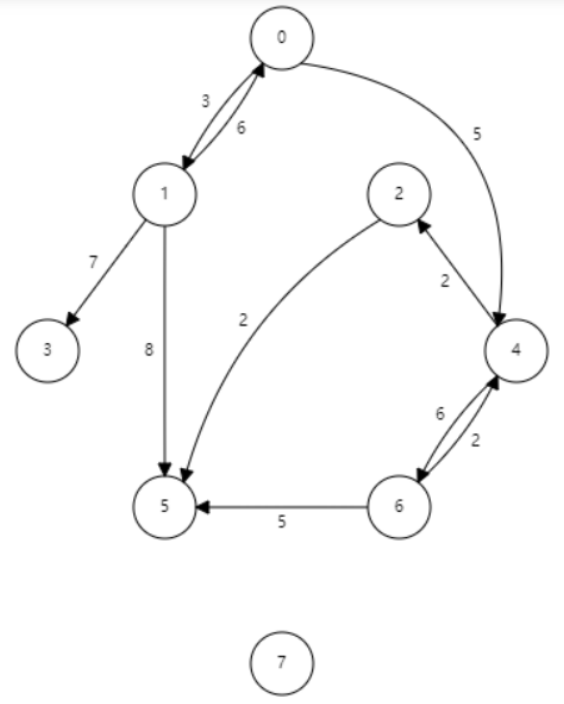

In [ ]:
Adjacency_List = {"0":[("1",3),("4",5)],
                  "1":[("0",6),("3",7),("5",8)],
                  "2":[("5",2)],
                  "4":[("2",2),("6",6)],
                  "6":[("4",2),("5",5)]}

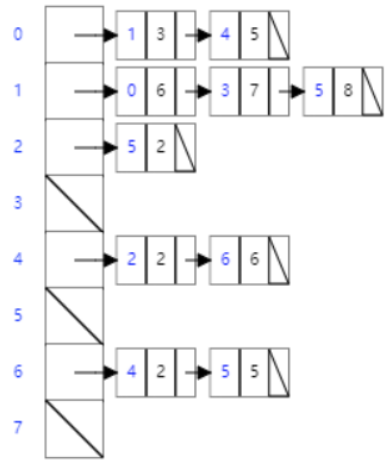

In [ ]:
dict_vertice_id_to_matrix_index = {}
dict_matrix_index_to_vertice_id = {}
for ii in range(8):
    dict_vertice_id_to_matrix_index[str(ii)] = ii
    dict_matrix_index_to_vertice_id[ii] = str(ii)

def convert_Adjacency_List_to_Adjacency_Matrix(Adjacency_List, set_unvisited, dict_vertice_id_to_matrix_index):
    # 在有向图或者不连通图中，len(Adjacency_List) <= len(set_unvisited)
    Adjacency_Matrix = [[float("inf")]*len(set_unvisited) for _ in range(len(set_unvisited))]
    for key, value in Adjacency_List.items():
        for item in value:
            row = dict_vertice_id_to_matrix_index[key]
            col = dict_vertice_id_to_matrix_index[item[0]]
            cost = item[1]
            Adjacency_Matrix[row][col] = cost
    return Adjacency_Matrix

Adjacency_Matrix = convert_Adjacency_List_to_Adjacency_Matrix(Adjacency_List, set([str(ii) for ii in range(8)]), dict_vertice_id_to_matrix_index)
for row in Adjacency_Matrix:
    print(row)

### Dijkstra算法
适用于单源正权图  
思想：从起始点开始，采用贪心算法策略，每次遍历到始点距离最近且未访问过的顶点的邻接节点，直到扩展到终点为止  

<code>
cur_distance_to_Vstart = {Vcur_id:0}
paths = {} # 路径
set_visited = set()
# 构造堆/heap，存储(当前顶点到起点的最短距离, 当前顶点的id)
Heap = [(0, Vcur_id)]
while Heap and Vcur_id != Vend_id:
    # step3. 从堆顶取一个顶点，作为当前顶点（贪婪）
    cost, Vcur_id = heapq.heappop(Heap)
    if Vcur_id not in set_visited: # 如果当前顶点未被访问过
        # step 4.1.从未访问顶点集合移除当前顶点
        set_visited.add(Vcur_id)
        # step 4.2.如果当前顶点在邻接表中
        if Vcur_id in AdjacencyList:
            for Vnext_id, dist in AdjacencyList[Vcur_id].items():
                # step 4.3.如果与当前顶点相连的顶点未被访问过
                if Vnext_id not in set_visited:
                    # step 4.4.松弛
                    len_cur2next = cur_distance_to_Vstart[Vcur_id]+dist
                    if (Vnext_id in cur_distance_to_Vstart and len_cur2next < cur_distance_to_Vstart[Vnext_id]) or Vnext_id not in cur_distance_to_Vstart:
                        cur_distance_to_Vstart[Vnext_id] = len_cur2next
                        paths[Vnext_id] = Vcur_id # 路径,记录上一个顶点
                        heapq.heappush(Heap, (cur_distance_to_Vstart[Vnext_id], Vnext_id))
                                                                                           </code>

![image.png](attachment:image.png)

### 弗洛伊德(Floyd)算法
适用于多源正权和无负权环的负权图  
思想：三层循环进行松弛，从i号顶点到j号顶点只经过前k号点的最短路程    
### 贝尔曼-福特(Bellman-Ford)算法
适用于单源无负权环的负权图  
思想：对所有的边进行n-1轮松弛操作，因为在一个含有n个顶点的图中，任意两点之间的最短路径最多包含n-1边  
### SPFA算法
适用于单源无负权环的负权图  
思想：设立一个先进先出的队列用来保存待优化的结点，优化时每次取出队首结点u，并且用u点当前的最短路径估计值对离开u点所指向的结点v进行松弛操作，如果v点的最短路径估计值有所调整，且v点不在当前的队列中，就将v点放入队尾。这样不断从队列中取出结点来进行松弛操作，直至队列空为止。

## 局部最短路

### 动态窗口算法(Dynamic Window Approach/DWA)
ROS代码：http://wiki.ros.org/dwa_local_planner  
https://blog.csdn.net/weixin_40884570/category_8068256.html  

待读论文：https://www.cnblogs.com/kin-zhang/p/15006838.html

### 算法框架  

#### Search space
The search space of the possible velocities is reduced in three steps:  
搜索空间：可能速度的搜索空间分三步缩小：  

##### Circular trajectories
The dynamic window approach considers only circular trajectories (curvatures) uniquely determined by pairs ($v,\omega$) of translational and rotational velocities. This results in a two-dimensional velocity search space.  
圆形轨迹：动态窗口方法仅考虑由平移和旋转速度对($v,\omega$)唯一确定的圆形轨迹(曲率)。这产生二维速度搜索空间。  
**<font color=red>决定了优化对象，即自变量</font>**。具体推导见 Fox, D., Burgard, W., & Thrun, S. (1997). The dynamic window approach to collision avoidance. IEEE Robotics & Automation Magazine, 4(1), 23-33. 公式(1)-(12)  

##### Admissible velocities
The restriction to admissible velocities ensures that only safe trajectories are considered. A pair ($v,\omega$) considered admissible, if the robot is able to stop before it reaches the closest obstacle on the corresponding curvature.  
允许速度：对允许速度的限制确保只考虑安全轨迹。 如果机器人能够在到达相应曲率上最近的障碍物之前停止，则认为($v,\omega$)对是允许的。  
$V_{admissible} = \{(v,\omega)|v\leq\sqrt{2\cdot dist(v_{cur},\omega_{cur})\cdot v_{decel}} \quad and\quad \omega \leq \sqrt{2\cdot dist(v_{cur},\omega_{cur})\cdot \omega_{decel}}\}$  
where $dist(v_{cur},\omega_{cur})$ 表示当前$v_{cur},\omega_{cur}$对应轨迹离最近障碍物的距离; $v_{decel}$ & $\omega_{decel}$-最大减速度.  
<font color=red>疑问: 到障碍物的距离与速度方向不一定共线</font>  
PS：Version 1未考虑该约束，Version 2中增加。对比观察，考虑该约束会：1）提高到障碍物的间隙；2）主程序迭代次数增多，计算量增加；3）找到最优路径的概率降低。个人倾向不考虑该约束条件。

##### Dynamic window
The dynamic window restricts the admissible velocities to those that can be reached within a short time interval given the limited accelerations of the robot.  
动态窗口：考虑到机器人的有限加速度，动态窗口将允许的速度限制在短时间内可以达到的速度。  
$V_d = \{(v,\omega)|v\in(v_{cur}-v_{decel}\cdot \Delta t, v_{cur}+v_{accel} \cdot \Delta t) \quad and \quad \omega \in (\omega_{cur}-\omega_{decel} \cdot \Delta t, \omega_{cur}+\omega_{accel} \cdot \Delta t)\}$  
where $v_{cur}$ & $\omega_{cur}$-当前线速度和角速度; $v_{decel}$ & $\omega_{decel}$-最大减速度; $v_{accel}$ & $\omega_{accel}$-最大加速度;  
<font color=red>疑问: $\omega_{decel} = \omega_{accel}? $</font>  

$dw = V_d \cap \{(v,\omega)|v\in(v_{min}, v_{max}) \quad and \quad \omega \in (-\omega_{max}, \omega_{max})\}$  

**<font color=red>限制/缩小自变量的取值范围，see Version 1 -> DWA核心 -> step 1</font>**  

#### Optimization
The objective function $F(v,\omega) = \sigma(\alpha\cdot heading(v,\omega)+\beta\cdot dist(v,\omega)+\gamma\cdot vel(v,\omega)) $ is maximized/<font color=red>minimized</font>. With respect to the current position and orientation of the robot this function trades off the following aspects:  
关于机器人的当前位置和方向，这个函数权衡了以下几个方面:  

##### Target heading
$heading$ is a measure of progress towards the goal location. It is maximal if the robot moves directly towards the target.  
目标航向：$heading$ 是对目标位置到目标位置的度量。如果机器人直接向目标移动，则取值最大。  

##### Clearance
$dist$ is the distance to the closest obstacle on the trajectory. The smaller the distance to an obstacle the higher is the robot's desire to move around it.  
间隙：$dist$ 是轨迹到最近障碍物的距离。到障碍物的距离越小，机器人绕它移动的愿望就越高。  

##### Velocity
$vel$ is the forward velocity of the robot and supports fast movements.   
速度：$vel$是机器人的前进速度，支持快速运动。  

##### smoothing
The function $\sigma$ smoothes the weighted sum of the three components and results in more side-clearance from obstacles.  
函数 $\sigma$ 平滑了三个分量的加权和，并产生更多的障碍物侧面间隙。  
For example, $F(v,\omega) = \alpha\cdot \frac{heading(v,\omega)}{\sum_{(v^{*},\omega^{*})}heading(v^{*},\omega^{*})}+\beta\cdot \frac{dist(v,\omega)}{\sum_{(v^{*},\omega^{*})}dist(v^{*},\omega^{*})}+\gamma\cdot \frac{vel(v,\omega)}{\sum_{(v^{*},\omega^{*})}vel(v^{*},\omega^{*})}$  
where $(v^{*},\omega^{*}) \in dw $
### Version 1
#### 参数

In [ ]:
import time
import math
import numpy as np

class Parameters:
    # robot parameter
    def __init__(self):
        # robot parameter
        self.max_speed = 1.0  # [m/s]                                       #最大线速度
        self.min_speed = -0.5  # [m/s]                                      #最小线速度
        self.max_yaw_rate = 40.0 * math.pi / 180.0  # [rad/s]               #最大角速度
        self.max_acceleration = 0.2  # [m/ss]                               #最大加速度
        self.max_deceleration = 0.4  # [m/ss]                               #最大减速度 
        self.max_delta_yaw_rate = 40.0 * math.pi / 180.0  # [rad/ss]
        self.max_negative_delta_yaw_rate = 40.0 * math.pi / 180.0  # [rad/ss]
        self.v_resolution = 0.01  # [m/s]                                   #线速度搜索间隔
        self.yaw_rate_resolution = 0.1 * math.pi / 180.0  # [rad/s]         #角速度搜素间隔
        self.dt = 0.1  # [s] Time tick for motion prediction                #时间间隔
        self.predict_time = 3.0  # [s]                                      #预测时间长度
        self.to_goal_cost_gain = 0.15                                       
        self.speed_cost_gain = 1.0
        self.obstacle_cost_gain = 1.0
        self.robot_stuck_flag_cons = 0.001                                  # constant to prevent robot stucked

        self.robot_type = "circle"                                          # "rectangle" or "circle"
        self.robot_radius = 1.0  # [m] for collision check                  #圆形机器人半径 in "circle"
        self.robot_width = 0.5  # [m] for collision check                   #矩形车的宽度   in "rectangle" 
        self.robot_length = 1.2  # [m] for collision check                  #矩形车的长度   in "rectangle" 

#### 运动模型

In [ ]:
def motion(x, u, dt):
    """
    motion model
    input:
    当前状态 x = [x(m),           -> x-coordinate
                  y(m),           -> y-coordinate
                  yaw(rad)        -> orientation (heading direction),
                  v(m/s)          -> translational velocity/线速度,
                  omega(rad/s)    -> rotational velocity/角速度]
    速度 u = [线速度, 角速度]
    微小的时间 dt
    """
    x[4] = u[1] # 更新角速度
    x[2] += u[1] * dt # 根据角速度更新偏航
    
    x[3] = u[0] # 更新线速度
    x[0] += u[0] * math.cos(x[2]) * dt
    x[1] += u[0] * math.sin(x[2]) * dt
    return x

#### DWA核心

In [ ]:
def velocity_optimization(x, para, goal, obstacles):
    # step 1. calculation dynamic window based on current state x
    # 1.1.Dynamic window from motion model
    Vd = [x[3] - para.max_deceleration * para.dt,
          x[3] + para.max_acceleration * para.dt,
          x[4] - para.max_negative_delta_yaw_rate * para.dt,
          x[4] + para.max_delta_yaw_rate * para.dt]
    # 1.2.速度限制
    # dw = [v_min/线速度下限, v_max/线速度上限, yaw_rate_min/角速度下限, yaw_rate_max/角速度上限]
    dw = [max(para.min_speed, Vd[0]),
          min(para.max_speed, Vd[1]),
          max(-para.max_yaw_rate, Vd[2]),
          min(para.max_yaw_rate, Vd[3])]
    # print("ratio of dynamic window to feasible region:", (dw[1]-dw[0])*(dw[3]-dw[2])/(para.max_speed-para.min_speed)/(2*para.max_yaw_rate)*100, "%")

    # step 2.网格化遍历动态窗口内的线速度和角速度，寻找最优线速度和角速度，并预测路径
    min_cost = float("inf")         # 记录目标函数
    best_u = [0.0, 0.0]             # 记录最优线速度和角速度
    best_trajectory = np.array([x]) # 记录预测轨迹
    for v in np.arange(dw[0], dw[1], para.v_resolution):
        for omega in np.arange(dw[2], dw[3], para.yaw_rate_resolution):
            # 2.1. 在当前线速度和角速度组合下，预测轨迹
            x_predict = np.array(x)             # 初始状态
            predicted_trajectory = np.array(x_predict)    # 记录轨迹
            Time = 0
            while Time < para.predict_time:
                x_predict = motion(x_predict, [v, omega], para.dt)  # 下一个状态
                predicted_trajectory = np.vstack((predicted_trajectory, x_predict))     # 记录预测轨迹
                Time += para.dt
            # 2.2 根据预测轨迹评估损失函数
            to_goal_cost = para.to_goal_cost_gain * calc_to_goal_cost(predicted_trajectory, goal)
            speed_cost = para.speed_cost_gain * (para.max_speed - predicted_trajectory[-1, 3])
            ob_cost = para.obstacle_cost_gain * calc_obstacle_cost(predicted_trajectory, obstacles, para)
            final_cost = to_goal_cost + speed_cost + ob_cost
            # 2.3.更新记录
            if final_cost <= min_cost:
                min_cost = final_cost
                best_u = [v, omega]
                # print(best_u)
                best_trajectory = predicted_trajectory
                # -------------特殊情况(避免停在障碍物前)待验证-----------------#
                if abs(best_u[0]) < para.robot_stuck_flag_cons and abs(x[3]) < para.robot_stuck_flag_cons:
                    # to ensure the robot do not get stuck in best v=0 m/s (in front of an obstacle)
                    # and best omega=0 rad/s (heading to the goal with angle difference of 0)
                    print("出现待验证情况")
                    best_u[1] = -para.max_delta_yaw_rate
                # ------------------------------------------------------------#
    return best_u, best_trajectory

#### 计算Clearance

In [ ]:
def calc_obstacle_cost(trajectory, ob, para):
    """
    # calc obstacle cost inf: collision
    # 源码
    """
    ox = ob[:, 0]
    oy = ob[:, 1]
    dx = trajectory[:, 0] - ox[:, None]
    dy = trajectory[:, 1] - oy[:, None]
    r = np.hypot(dx, dy)

    if para.robot_type == "rectangle":
        yaw = trajectory[:, 2]
        rot = np.array([[np.cos(yaw), -np.sin(yaw)], [np.sin(yaw), np.cos(yaw)]])
        rot = np.transpose(rot, [2, 0, 1])
        local_ob = ob[:, None] - trajectory[:, 0:2]
        local_ob = local_ob.reshape(-1, local_ob.shape[-1])
        local_ob = np.array([local_ob @ x for x in rot])
        local_ob = local_ob.reshape(-1, local_ob.shape[-1])
        upper_check = local_ob[:, 0] <= para.robot_length / 2
        right_check = local_ob[:, 1] <= para.robot_width / 2
        bottom_check = local_ob[:, 0] >= -para.robot_length / 2
        left_check = local_ob[:, 1] >= -para.robot_width / 2
        if (np.logical_and(np.logical_and(upper_check, right_check),
                            np.logical_and(bottom_check, left_check))).any():
            return float("Inf")
    elif para.robot_type == "circle":
        if np.array(r <= para.robot_radius).any():
            return float("Inf")

    min_r = np.min(r)
    return 1.0 / min_r

def calc_obstacle_cost_v1(predicted_trajectory, obstacles, para):
    """
    # 复现calc_obstacle_cost函数
    # 根据当前轨迹上的每个位置与每个障碍物位置，计算当前轨迹到最近障碍物的距离(min_gap)，即安全距离。安全距离越大越好
    # 返回安全距离的倒数，安全距离越大，输出越小(主程序是最小化)
    """
    min_gap = float("inf")
    for ii in range(obstacles.shape[0]):
        for jj in range(predicted_trajectory.shape[0]):
            x = predicted_trajectory[jj]
            goal = obstacles[ii]
            if check_reach_goal(x, goal, para):
                return float("inf")
            else:
                cur_gap = math.hypot(x[0] - goal[0], x[1] - goal[1])
            min_gap = min(min_gap, cur_gap)
    return 1.0 / min_gap

def calc_obstacle_cost_v2(predicted_trajectory, obstacles, para):
    """
    # 针对calc_obstacle_cost_v1，通过numpy提速
    """
    ox = obstacles[:, 0]
    oy = obstacles[:, 1]
    dx = predicted_trajectory[:, 0] - ox[:, None]
    dy = predicted_trajectory[:, 1] - oy[:, None]
    gap = np.hypot(dx, dy)   # 第i个障碍物(第i行)到第j个轨迹点(第j列)的距离
   
    if para.robot_type == "rectangle":
        for jj in range(predicted_trajectory.shape[0]):
            temp = np.vstack((dx[:,jj],
                              dy[:,jj]))                        # 当前轨迹中第jj个位置指向所有障碍物向量，第一行为横坐标，第二行为纵坐标，每列对应一个障碍物
            yaw = predicted_trajectory[jj,2]                    # 当前轨迹中第jj个位置的航偏
            rot_cur = np.array([[np.cos(yaw), np.sin(yaw)],
                                [-np.sin(yaw), np.cos(yaw)]])   # 旋转矩阵
            temp_after_rotate = np.dot(rot_cur, temp)           # 以当前轨迹中第jj个位置为中心，顺时针旋转，得到障碍物在新坐标系中的位置
            if jj == 0:
                dx_after_rotate = np.array(temp_after_rotate[0][:, None])   # 记录旋转后的障碍物横坐标
                dy_after_rotate = np.array(temp_after_rotate[1][:, None])   # 记录旋转后的障碍物纵坐标
            else:
                dx_after_rotate = np.hstack((dx_after_rotate, temp_after_rotate[0][:, None]))
                dy_after_rotate = np.hstack((dy_after_rotate, temp_after_rotate[1][:, None]))
    
        upper_check = dx_after_rotate <= para.robot_length / 2
        bottom_check = dx_after_rotate >= -para.robot_length / 2
        right_check = dy_after_rotate <= para.robot_width / 2
        left_check = dy_after_rotate >= -para.robot_width / 2
        # 如果障碍物在矩形范围内，则碰触障碍物，返回inf
        if (np.logical_and(np.logical_and(upper_check, right_check),
                            np.logical_and(bottom_check, left_check))).any():
            return float("Inf")
    elif para.robot_type == "circle":
        if np.array(gap <= para.robot_radius).any():
            return float("Inf")

    min_gap = np.min(gap)
    return 1.0 / min_gap

#### 计算Target heading

In [ ]:
def calc_to_goal_cost(predicted_trajectory, goal):
    """
    # calc to goal cost with angle difference
    # 行进方向与目标的夹角
    """
    dx = goal[0] - predicted_trajectory[-1, 0]
    dy = goal[1] - predicted_trajectory[-1, 1]
    # 1.当前位置指向目标的向量与X轴的夹角
    error_angle = math.atan2(dy, dx)
    # 2. 指向目标的向量与当前偏航的角度误差
    cost_angle = error_angle - predicted_trajectory[-1, 2]
    # 3. 将角度差转换到[0,pi/2)内
    cost = abs(math.atan2(math.sin(cost_angle), math.cos(cost_angle)))
    return cost

#### 输入

In [ ]:
# 初始状态
x = np.array([0.0, 0.0, math.pi / 8.0, 0.0, 0.0]) # initial state [x(m), y(m), yaw(rad)偏航, v(m/s)线速度, omega(rad/s)角速度]
# 目标位置
goal = np.array([10.0, 10.0]) # goal position [x(m), y(m)]
# 例子1：官方
obstacles = np.array([[-1, -1],
                    [0, 2],
                    [4.0, 2.0],
                    [5.0, 4.0],
                    [5.0, 5.0],
                    [5.0, 6.0],
                    [5.0, 9.0],
                    [8.0, 9.0],
                    [7.0, 9.0],
                    [8.0, 10.0],
                    [9.0, 11.0],
                    [12.0, 13.0],
                    [12.0, 12.0],
                    [15.0, 15.0],
                    [13.0, 13.0]]) # 障碍物的中心位置

#### 主程序
源码

In [ ]:
# # 主程序
# start = time.time()
# para = Parameters()               #参数实例化
# trajectory = np.array(x)          #记录所有状态
# record_predicted_trajectory = []  #记录预测轨迹
# while math.hypot(x[0] - goal[0], x[1] - goal[1]) > para.robot_radius: # sqrt(x*x + y*y)
#     # 1.寻找最优速度u,即[线速度,角速度]，及在最优速度u下的预测轨迹，仅用于绘图 
#     u, predicted_trajectory = velocity_optimization(x, para, goal, obstacles)
#     # 2.根据最优速度u推演并记录下一个状态x
#     x = motion(x, u, para.dt)
#     trajectory = np.vstack((trajectory, x))  # store state history
#     record_predicted_trajectory.append(predicted_trajectory)
# end = time.time()
# print("耗时:",end-start)

源码中的循环判断仅依据圆形机器人的半径，若同时考虑圆形机器人和矩形机器人，循环判断标准修改如下：

In [ ]:
def check_reach_goal(x, goal, para):
    if para.robot_type == "rectangle":
        yaw = x[2]
        rot_cur = np.array([[np.cos(yaw), np.sin(yaw)],
                            [-np.sin(yaw), np.cos(yaw)]]) # 顺时针旋转，使新坐标系的y轴指向车的前进方向
        # reference: https://blog.csdn.net/atu_1982/article/details/80345611
        vector_after_rotate = np.dot(rot_cur, x[0:2]-goal[0:2])
        if -para.robot_length/2 <= vector_after_rotate[0] <= para.robot_length/2 and -para.robot_width/2 <= vector_after_rotate[1] <= para.robot_width/2: #目标点在矩形之内
            return True
        else:
            return False
    elif para.robot_type == "circle":
        if math.hypot(x[0] - goal[0], x[1] - goal[1]) <= para.robot_radius:
            return True
        else:
            return False
        
# 主程序
start = time.time()
para = Parameters()               #参数实例化
trajectory = np.array(x)          #记录所有状态
record_predicted_trajectory = []  #记录预测轨迹

loop = 0
label = check_reach_goal(x, goal, para)

while not label and loop < 2000: # sqrt(x*x + y*y)
    # 1.寻找最优的线速度和角速度
    u, predicted_trajectory = velocity_optimization(x, para, goal, obstacles)
    # 2.推演下一个状态
    x = motion(x, u, para.dt)
    label = check_reach_goal(x, goal, para)
    # 3. 记录
    trajectory = np.vstack((trajectory, x))  # store state history
    record_predicted_trajectory.append(predicted_trajectory)
    # print(loop)
    loop += 1

end = time.time()
print("耗时:",end-start)
if label:
    print("到达目的地")
else:
    print("未找到路径")

#### 绘图

In [ ]:
# 绘图
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)

# 绘制预测轨迹
for index in range(len(record_predicted_trajectory)):
    ax.plot(record_predicted_trajectory[index][:,0], record_predicted_trajectory[index][:,1], color="green", linestyle='-') # 最优路径

# 绘制优化轨迹
if para.robot_type == "circle":
    theta = np.linspace(0, 2 * np.pi, 200)
    for ii in range(trajectory.shape[0]):
        a,b = trajectory[ii,0], trajectory[ii,1] #圆心
        r = para.robot_radius = 1.0     #半径
        # theta = numpy.linspace(0, 2 * numpy.pi, 200)
        x = a + r * np.cos(theta)
        y = b + r * np.sin(theta)
        ax.plot(x, y, color="pink", linewidth=2)
elif para.robot_type == "rectangle":
    for ii in range(trajectory.shape[0]):
        outline = np.array([[-para.robot_length/2, para.robot_length/2, para.robot_length/2, -para.robot_length/2, -para.robot_length/2],
                            [ para.robot_width/2,  para.robot_width/2, -para.robot_width/2,  -para.robot_width/2,   para.robot_width/2]])
                            # 左上,                右上,                右下,                 左下,                  左上
        yaw = trajectory[ii,2]
        Rot = np.array([[math.cos(yaw), -math.sin(yaw)],
                          [math.sin(yaw), math.cos(yaw)]])
        outline = np.dot(Rot.T,outline)
        outline[0, :] += trajectory[ii,0]
        outline[1, :] += trajectory[ii,1]
        ax.plot(outline[0],outline[1], color="pink", linewidth=2)


# 绘制起点
ax.scatter(0., 0., s=50, c='red', marker="*")
# 绘制终点
ax.scatter(goal[0], goal[1], s=50, c='red', marker="*")
# 绘制障碍物
ax.scatter(obstacles[:,0], obstacles[:,1], s=10, c='blue')

### Version 2  
改进参考：https://blog.csdn.net/heyijia0327/article/details/44983551  

In [1]:
# 较 Version 1 未变化部分
import time
import math
import numpy as np

class Parameters:
    # robot parameter
    def __init__(self):
        # robot parameter
        self.max_speed = 1.0  # [m/s]                                       #最大线速度
        self.min_speed = -0.5  # [m/s]                                      #最小线速度
        self.max_yaw_rate = 40.0 * math.pi / 180.0  # [rad/s]               #最大角速度
        self.max_acceleration = 0.2  # [m/ss]                               #最大加速度
        self.max_deceleration = 0.4  # [m/ss]                               #最大减速度 
        self.max_delta_yaw_rate = 40.0 * math.pi / 180.0  # [rad/ss]
        self.max_negative_delta_yaw_rate = 40.0 * math.pi / 180.0  # [rad/ss]
        self.v_resolution = 0.01  # [m/s]                                   #线速度搜索间隔
        self.yaw_rate_resolution = 0.1 * math.pi / 180.0  # [rad/s]         #角速度搜素间隔
        self.dt = 0.1  # [s] Time tick for motion prediction                #时间间隔
        self.predict_time = 3.0  # [s]                                      #预测时间长度
        self.to_goal_cost_gain = 0.15                                       
        self.speed_cost_gain = 1.0
        self.obstacle_cost_gain = 1.0
        self.robot_stuck_flag_cons = 0.001                                  # constant to prevent robot stucked

        self.robot_type = "circle"                                          # "rectangle" or "circle"
        self.robot_radius = 1.0  # [m] for collision check                  #圆形机器人半径 in "circle"
        self.robot_width = 0.5  # [m] for collision check                   #矩形车的宽度   in "rectangle" 
        self.robot_length = 1.2  # [m] for collision check                  #矩形车的长度   in "rectangle" 
        
def motion(x, u, dt):
    """
    motion model
    input:
    当前状态 x = [x(m),           -> x-coordinate
                  y(m),           -> y-coordinate
                  yaw(rad)        -> orientation (heading direction),
                  v(m/s)          -> translational velocity/线速度,
                  omega(rad/s)    -> rotational velocity/角速度]
    速度 u = [线速度, 角速度]
    微小的时间 dt
    """
    x[4] = u[1] # 更新角速度
    x[2] += u[1] * dt # 根据角速度更新偏航
    
    x[3] = u[0] # 更新线速度
    x[0] += u[0] * math.cos(x[2]) * dt
    x[1] += u[0] * math.sin(x[2]) * dt
    return x

def calc_obstacle_cost(predicted_trajectory, obstacles, para):
    """
    # 针对calc_obstacle_cost_v1，通过numpy提速
    """
    ox = obstacles[:, 0]
    oy = obstacles[:, 1]
    dx = predicted_trajectory[:, 0] - ox[:, None]
    dy = predicted_trajectory[:, 1] - oy[:, None]
    gap = np.hypot(dx, dy)   # 第i个障碍物(第i行)到第j个轨迹点(第j列)的距离
   
    if para.robot_type == "rectangle":
        for jj in range(predicted_trajectory.shape[0]):
            temp = np.vstack((dx[:,jj],
                              dy[:,jj]))                        # 当前轨迹中第jj个位置指向所有障碍物向量，第一行为横坐标，第二行为纵坐标，每列对应一个障碍物
            yaw = predicted_trajectory[jj,2]                    # 当前轨迹中第jj个位置的航偏
            rot_cur = np.array([[np.cos(yaw), np.sin(yaw)],
                                [-np.sin(yaw), np.cos(yaw)]])   # 旋转矩阵
            temp_after_rotate = np.dot(rot_cur, temp)           # 以当前轨迹中第jj个位置为中心，顺时针旋转，得到障碍物在新坐标系中的位置
            if jj == 0:
                dx_after_rotate = np.array(temp_after_rotate[0][:, None])   # 记录旋转后的障碍物横坐标
                dy_after_rotate = np.array(temp_after_rotate[1][:, None])   # 记录旋转后的障碍物纵坐标
            else:
                dx_after_rotate = np.hstack((dx_after_rotate, temp_after_rotate[0][:, None]))
                dy_after_rotate = np.hstack((dy_after_rotate, temp_after_rotate[1][:, None]))
    
        upper_check = dx_after_rotate <= para.robot_length / 2
        bottom_check = dx_after_rotate >= -para.robot_length / 2
        right_check = dy_after_rotate <= para.robot_width / 2
        left_check = dy_after_rotate >= -para.robot_width / 2
        # 如果障碍物在矩形范围内，则碰触障碍物，返回inf
        if (np.logical_and(np.logical_and(upper_check, right_check),
                            np.logical_and(bottom_check, left_check))).any():
            return float("Inf")
    elif para.robot_type == "circle":
        if np.array(gap <= para.robot_radius).any():
            return float("Inf")

    min_gap = np.min(gap)
    return 1.0 / min_gap

def calc_to_goal_cost(predicted_trajectory, goal):
    """
    # calc to goal cost with angle difference
    # 行进方向与目标的夹角
    """
    dx = goal[0] - predicted_trajectory[-1, 0]
    dy = goal[1] - predicted_trajectory[-1, 1]
    # 1.当前位置指向目标的向量与X轴的夹角
    error_angle = math.atan2(dy, dx)
    # 2. 指向目标的向量与当前偏航的角度误差
    cost_angle = error_angle - predicted_trajectory[-1, 2]
    # 3. 将角度差转换到[0,pi/2)内
    cost = abs(math.atan2(math.sin(cost_angle), math.cos(cost_angle)))
    return cost

# 初始状态
x = np.array([0.0, 0.0, math.pi / 8.0, 0.0, 0.0]) # initial state [x(m), y(m), yaw(rad)偏航, v(m/s)线速度, omega(rad/s)角速度]
# 目标位置
goal = np.array([10.0, 10.0]) # goal position [x(m), y(m)]
# 例子1：官方
obstacles = np.array([[-1, -1],
                    [0, 2],
                    [4.0, 2.0],
                    [5.0, 4.0],
                    [5.0, 5.0],
                    [5.0, 6.0],
                    [5.0, 9.0],
                    [8.0, 9.0],
                    [7.0, 9.0],
                    [8.0, 10.0],
                    [9.0, 11.0],
                    [12.0, 13.0],
                    [12.0, 12.0],
                    [15.0, 15.0],
                    [13.0, 13.0]]) # 障碍物的中心位置

def check_reach_goal(x, goal, para):
    if para.robot_type == "rectangle":
        yaw = x[2]
        rot_cur = np.array([[np.cos(yaw), np.sin(yaw)],
                            [-np.sin(yaw), np.cos(yaw)]]) # 顺时针旋转，使新坐标系的y轴指向车的前进方向
        # reference: https://blog.csdn.net/atu_1982/article/details/80345611
        vector_after_rotate = np.dot(rot_cur, x[0:2]-goal[0:2])
        if -para.robot_length/2 <= vector_after_rotate[0] <= para.robot_length/2 and -para.robot_width/2 <= vector_after_rotate[1] <= para.robot_width/2: #目标点在矩形之内
            return True
        else:
            return False
    elif para.robot_type == "circle":
        if math.hypot(x[0] - goal[0], x[1] - goal[1]) <= para.robot_radius:
            return True
        else:
            return False

#### 改进部分

In [2]:
def velocity_optimization_v2(x, para, goal, obstacles):
    # 1. calculation dynamic window based on current state x
    # 1.1.Dynamic window from motion model
    Vd = [x[3] - para.max_deceleration * para.dt,
          x[3] + para.max_acceleration * para.dt,
          x[4] - para.max_negative_delta_yaw_rate * para.dt,
          x[4] + para.max_delta_yaw_rate * para.dt]
    # 1.2.速度限制
    # dw = [v_min/线速度下限, v_max/线速度上限, yaw_rate_min/角速度下限, yaw_rate_max/角速度上限]
    dw = [max(para.min_speed, Vd[0]),
          min(para.max_speed, Vd[1]),
          max(-para.max_yaw_rate, Vd[2]),
          min(para.max_yaw_rate, Vd[3])]
    # print("ratio of dynamic window to feasible region:", (dw[1]-dw[0])*(dw[3]-dw[2])/(para.max_speed-para.min_speed)/(2*para.max_yaw_rate)*100, "%")

    # 2.网格化遍历动态窗口内的线速度和角速度，寻找最优线速度和角速度，并预测路径
    record_for_calculating_cost = np.array([])
    record_predicted_trajectory = []
    for v in np.arange(dw[0], dw[1], para.v_resolution):
        for omega in np.arange(dw[2], dw[3], para.yaw_rate_resolution):
            # 2.1. 在当前线速度和角速度组合下，预测轨迹
            x_predict = np.array(x)             # 初始状态
            predicted_trajectory = np.array(x_predict)    # 记录轨迹
            Time = 0
            while Time < para.predict_time:
                x_predict = motion(x_predict, [v, omega], para.dt)  # 下一个状态
                predicted_trajectory = np.vstack((predicted_trajectory, x_predict))     # 记录预测轨迹
                Time += para.dt
            # 2.2 根据预测轨迹计算并记录heading, clearance & velocity
            clearance = calc_obstacle_cost(predicted_trajectory, obstacles, para) # 注意：clearance 为轨迹到最近障碍物距离的倒数
            # 如果满足Admissible velocities，并且未接触障碍物
            if v <= (2/clearance*para.max_acceleration)**0.5 and omega <= (2/clearance*para.max_delta_yaw_rate)**0.5 and clearance < float("inf"):
                heading = calc_to_goal_cost(predicted_trajectory, goal)
                velocity = para.max_speed - predicted_trajectory[-1, 3]
                if record_for_calculating_cost.shape[0] == 0:
                    record_for_calculating_cost = np.array([v, omega, heading, clearance, velocity])
                    record_for_calculating_cost = record_for_calculating_cost.reshape(-1,record_for_calculating_cost.shape[0])
                else:
                    record_for_calculating_cost = np.vstack((record_for_calculating_cost, np.array([v, omega, heading, clearance, velocity]) ))
                record_predicted_trajectory.append(predicted_trajectory)
    # 3. 根据记录（线速度, 角速度, heading, clearance & velocity）选择最优线速度和角速度组合
    min_cost = float("inf")         # 记录目标函数
    best_u = [0.0, 0.0]             # 记录最优线速度和角速度
    best_trajectory = np.array([x]) # 记录预测轨迹
    # 归一化分母
    all_heading = np.sum(record_for_calculating_cost[:,2])
    all_clearance = np.sum(record_for_calculating_cost[:,3])
    all_velocity = np.sum(record_for_calculating_cost[:,4])
    assert(0<para.to_goal_cost_gain<1 and 0<para.obstacle_cost_gain<1 and 0<para.to_goal_cost_gain+para.obstacle_cost_gain<1)
    for ii in range(record_for_calculating_cost.shape[0]):
        # 归一化并计算目标函数值
        cur_cost = (para.to_goal_cost_gain * record_for_calculating_cost[ii,2] / all_heading
                    + para.obstacle_cost_gain * record_for_calculating_cost[ii,3] / all_clearance
                    + (1-para.to_goal_cost_gain-para.obstacle_cost_gain) * record_for_calculating_cost[ii,4] / all_velocity)
        if cur_cost < min_cost:
            min_cost = cur_cost
            best_u = [record_for_calculating_cost[ii,0], record_for_calculating_cost[ii,1]]
            best_trajectory = record_predicted_trajectory[ii]
            # -------------避免停在障碍物前-----------------#
            if abs(best_u[0]) < para.robot_stuck_flag_cons and abs(x[3]) < para.robot_stuck_flag_cons:
                # to ensure the robot do not get stuck in best v=0 m/s (in front of an obstacle)
                # and best omega=0 rad/s (heading to the goal with angle difference of 0)
                best_u[1] = -para.max_delta_yaw_rate
            # ------------------------------------------------------------#
    return best_u, best_trajectory

#### 目标函数权重参数设置

In [3]:
# 主程序
start = time.time()
para = Parameters()               #参数实例化
#-------------目标函数权重设置---------------------#
para.to_goal_cost_gain = 0.45
para.obstacle_cost_gain = 0.35
assert 0<para.to_goal_cost_gain<1 and 0<para.obstacle_cost_gain<1 and 0<para.to_goal_cost_gain+para.obstacle_cost_gain<1
#--------------------------------------------------#
trajectory = np.array(x)          #记录所有状态
record_predicted_trajectory = []  #记录预测轨迹

loop = 0
label = check_reach_goal(x, goal, para)

while not label and loop < 2000: # sqrt(x*x + y*y)
    # 1.寻找最优的线速度和角速度
    u, predicted_trajectory = velocity_optimization_v2(x, para, goal, obstacles)
    # 2.推演下一个状态
    x = motion(x, u, para.dt)
    label = check_reach_goal(x, goal, para)
    # 3. 记录
    trajectory = np.vstack((trajectory, x))  # store state history
    record_predicted_trajectory.append(predicted_trajectory)
    # print(loop)
    loop += 1

end = time.time()
print("耗时:",end-start)
if label:
    print("到达目的地")
else:
    print("未找到路径")

耗时: 113.26524424552917
到达目的地


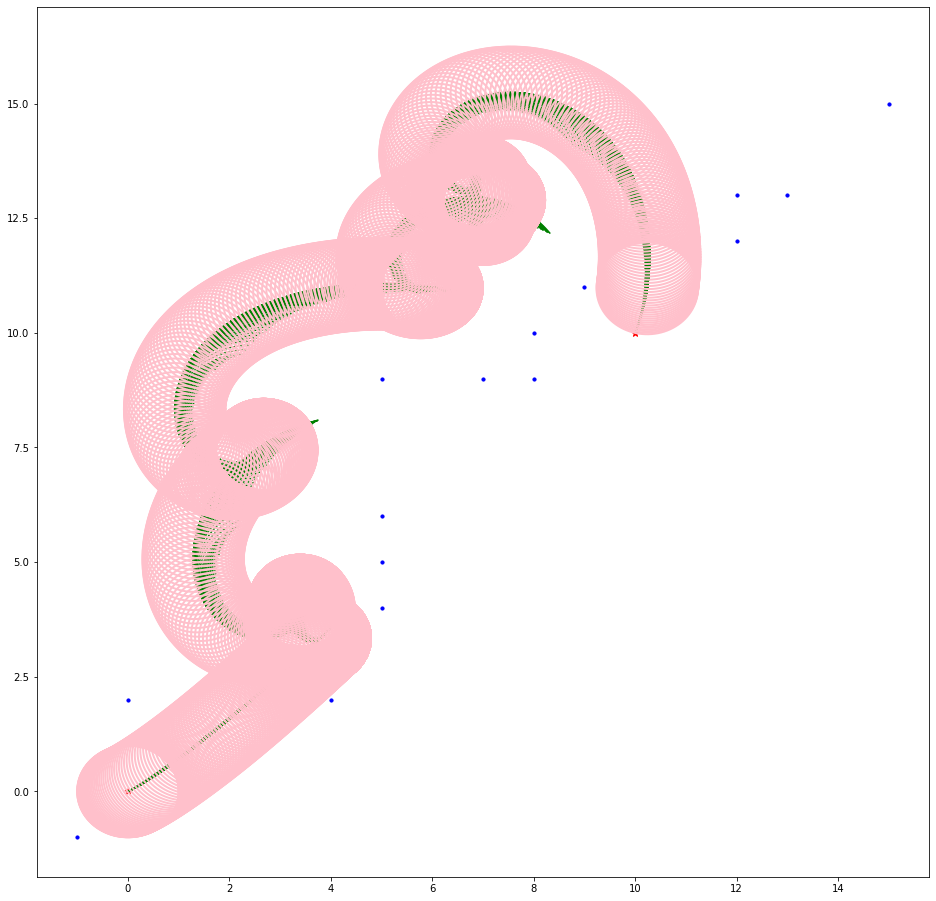

In [4]:
# 绘图
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)

# 绘制预测轨迹
for index in range(len(record_predicted_trajectory)):
    ax.plot(record_predicted_trajectory[index][:,0], record_predicted_trajectory[index][:,1], color="green", linestyle='-') # 最优路径

# 绘制优化轨迹
if para.robot_type == "circle":
    theta = np.linspace(0, 2 * np.pi, 200)
    for ii in range(trajectory.shape[0]):
        a,b = trajectory[ii,0], trajectory[ii,1] #圆心
        r = para.robot_radius = 1.0     #半径
        # theta = numpy.linspace(0, 2 * numpy.pi, 200)
        x = a + r * np.cos(theta)
        y = b + r * np.sin(theta)
        ax.plot(x, y, color="pink", linewidth=2)
elif para.robot_type == "rectangle":
    for ii in range(trajectory.shape[0]):
        outline = np.array([[-para.robot_length/2, para.robot_length/2, para.robot_length/2, -para.robot_length/2, -para.robot_length/2],
                            [ para.robot_width/2,  para.robot_width/2, -para.robot_width/2,  -para.robot_width/2,   para.robot_width/2]])
                            # 左上,                右上,                右下,                 左下,                  左上
        yaw = trajectory[ii,2]
        Rot = np.array([[math.cos(yaw), -math.sin(yaw)],
                          [math.sin(yaw), math.cos(yaw)]])
        outline = np.dot(Rot.T,outline)
        outline[0, :] += trajectory[ii,0]
        outline[1, :] += trajectory[ii,1]
        ax.plot(outline[0],outline[1], color="pink", linewidth=2)


# 绘制起点
ax.scatter(0., 0., s=50, c='red', marker="*")
# 绘制终点
ax.scatter(goal[0], goal[1], s=50, c='red', marker="*")
# 绘制障碍物
ax.scatter(obstacles[:,0], obstacles[:,1], s=10, c='blue')

### 势场法(Potential Field)
特点：网格化势场图的计算花费占绝大部分。二维空间较大时，适用于静态路径规划  
$ U_{att} = \frac{1}{2}\cdot KP \cdot \sqrt{ (x_{cur}-x_{end})^2 + (x_{cur}-x_{end})^2 } $  
$ U_{rep} = \begin{cases}
\frac{1}{2}\eta(\frac{1}{dist}-\frac{1}{r_{robot}})^2, \quad dist \leq r_{robot} \\
0, \quad dist > r_{robot} \\
dist = \sqrt{ (x_{cur}-x_{nearest-obstacle})^2 + (x_{cur}-x_{nearest-obstacle})^2 } - r_{nearest-obstacle}
\end{cases}$  
$ U = U_{att} + U_{rep} $

$r_{robot}$:机器人半径; $r_{nearest-obstacle}$:障碍物半径

In [ ]:
def calc_attractive_potential(Vcur, Vend, para):
    # 计算引力
    return 0.5 * para.KP * math.hypot(Vcur[0] - Vend[0], Vcur[1] - Vend[1])

def calc_repulsive_potential(Vcur, obstacles, para):
    # 计算当前位置到最近障碍物的距离
    dq = float("inf")
    for ox, oy, radius in obstacles:
        dist = math.hypot(Vcur[0]-ox,Vcur[1]-oy) - radius
        if dist < dq:
            dq = dist
    # 根据计算排斥力
    if dq <= para.robot_radius:
        if dq <= 0.1:
            dq = 0.1
        return 0.5 * para.ETA * (1.0 / dq - 1.0 / para.robot_radius) ** 2
    else:
        return 0.0

In [ ]:
import math
import time
# --------------输入--------------------------------------------------------- #
Vstart = [0.0, 10.0] # 起点
Vend = [30.0, 30.0]  # 终点
obstacles = [[5.0, 15.0, 5.0],
                 [15.0, 25.0, 0.3],
                 [20.0, 26.0, 0.1],
                 [25.0, 25.0, 0.2]] # 障碍物[x轴,y轴,半径]
# obstacles = [[15.0, 25.0, 5.0],
#                  [5.0, 15.0, 4.0],
#                  [20.0, 26.0, 3.0],
#                  [25.0, 25.0, 4.0]] # 障碍物[x轴,y轴,半径]

# --------------参数------------- #

class Parameters:
    """
    simulation parameter class
    """
    def __init__(self):
        # robot parameter
        self.grid_size = 0.1  # potential grid size [m]
        self.percentage_of_expand = 0.1  # 网格边界扩展比例
        self.KP = 1.0  # attractive potential gain
        self.ETA = 2.0  # repulsive potential gain
        # KP不动，仅调整ETA即可
        self.robot_radius = 5.0  # [m]  圆形机器人半径

para = Parameters()
# --------------------------------------------------------------------------- #
def calculate_grid_range(Vstart, Vend, obstacles, para):
    # 计算网格范围
    x_axis_min, x_axis_max, y_axis_min, y_axis_max = float("inf"), -float("inf"), float("inf"), -float("inf")
    for obx, oby, r in obstacles:
        x_axis_min = min(x_axis_min, obx)
        x_axis_max = max(x_axis_max, obx)
        y_axis_min = min(y_axis_min, oby)
        y_axis_max = max(y_axis_max, oby)
    x_axis_min = min(x_axis_min, Vstart[0], Vend[0])
    x_axis_max = max(x_axis_max, Vstart[0], Vend[0])
    y_axis_min = min(y_axis_min, Vstart[1], Vend[1])
    y_axis_max = max(y_axis_max, Vstart[1], Vend[1])
    x_axis_expand = (x_axis_max-x_axis_min)*para.percentage_of_expand
    y_axis_expand = (y_axis_max-y_axis_min)*para.percentage_of_expand
    x_axis_min -= x_axis_expand
    x_axis_max += x_axis_expand
    y_axis_min -= y_axis_expand
    y_axis_max += y_axis_expand
    return x_axis_min, x_axis_max, y_axis_min, y_axis_max

def calculate_potential_field(Vend, obstacles, para, x_axis_min, x_axis_max, y_axis_min, y_axis_max):
    # 网格化计算整个空间的potential
    potential_map = []
    for x_coordinate in [ix*para.grid_size+x_axis_min for ix in range(int(round((x_axis_max - x_axis_min) / para.grid_size)))]:
        row = []
        for y_coordinate in [iy*para.grid_size+y_axis_min for iy in range(int(round((y_axis_max - y_axis_min) / para.grid_size)))]:
            # 当前网格坐标
            Vcur = [x_coordinate, y_coordinate] 
            # 计算当前网格的potential
            potential = calc_attractive_potential(Vcur, Vend, para) + calc_repulsive_potential(Vcur, obstacles, para)
            row.append(potential)
        potential_map.append(row)
    return potential_map
    
def get_motion_model(n):
    # 运动规则
    assert n == 4 or n == 8
    if n == 4:
        motion = [[1, 0],[0, 1],[-1, 0],[0, -1]]
    elif n == 8:
        motion = [[1, 0],[0, 1],[-1, 0],[0, -1],
                  [-1, -1],[-1, 1],[1, -1],[1, 1]]
    return motion

# --------------主程序-------------- #
start1 = time.time()
# 1.计算网格范围
x_axis_min, x_axis_max, y_axis_min, y_axis_max = calculate_grid_range(Vstart, Vend, obstacles, para)
# 2.计算 potential field
potential_map = calculate_potential_field(Vend, obstacles, para, x_axis_min, x_axis_max, y_axis_min, y_axis_max)
end1 = time.time()
print("time of calculating potential field:", end1-start1)

# 3.读取邻域规则
motion = get_motion_model(8)

start2 = time.time()
dist_to_Vend = math.hypot(Vstart[0] - Vend[0], Vstart[1] - Vend[1]) #记录当前位置(起点)到终点的距离
# 4.将起点对齐到potential_map的网格中
x_index_cur = int((Vstart[0] - x_axis_min) / para.grid_size)
y_index_cur = int((Vstart[1] - y_axis_min) / para.grid_size)

path = [tuple(Vstart)] # 记录路径
path_set = set()       # 用于判断路径中是否存在环
path_set.add(tuple(Vstart))
while dist_to_Vend >= para.grid_size:
    # 5.在邻域中寻找potential最小的位置索引
    min_potential = float("inf")
    x_index_min, y_index_min = -1, -1
    for x,y in motion:
        x_index_neighbor = x_index_cur + x
        y_index_neighbor = y_index_cur + y
        potential = potential_map[x_index_neighbor][y_index_neighbor]
        if min_potential > potential:
            min_potential = potential
            x_index_min, y_index_min = x_index_neighbor, y_index_neighbor
    # 6.更新位置及距离
    x_index_cur, y_index_cur = x_index_min, y_index_min
    x_coordinate_cur = x_index_cur * para.grid_size + x_axis_min
    y_coordinate_cur = y_index_cur * para.grid_size + y_axis_min
    dist_to_Vend = math.hypot(x_coordinate_cur - Vend[0], y_coordinate_cur - Vend[1])
    # 7.判断是否在环，如不存在则记录路径
    if (x_coordinate_cur,y_coordinate_cur) not in path_set:
        path.append((x_coordinate_cur,y_coordinate_cur)) # 记录路径
        path_set.add((x_coordinate_cur,y_coordinate_cur))
    else:
        print("路径中出现环!!无法到达终点!!")
        break
end2 = time.time()
print("time of calculating path", end2-start2)
print("potential field ratio",(end1-start1)/(end1-start1+end2-start2))
# print("path:", path)

In [ ]:
# 绘图
import matplotlib.pyplot as plt
import numpy

num_point_in_circle = 200
num_contour = 500

x_axis_min, x_axis_max, y_axis_min, y_axis_max = calculate_grid_range(Vstart, Vend, obstacles, para)
x = numpy.array([ix*para.grid_size+x_axis_min for ix in range(int(round((x_axis_max - x_axis_min) / para.grid_size)))])
y = numpy.array([iy*para.grid_size+y_axis_min for iy in range(int(round((y_axis_max - y_axis_min) / para.grid_size)))])
X, Y = numpy.meshgrid(x, y)
Z = calculate_potential_field(Vend, obstacles, para, x_axis_min, x_axis_max, y_axis_min, y_axis_max)
Z = numpy.array(Z).T

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
# 绘制 potential field
CS = ax.contour(X, Y, Z, num_contour)
ax.clabel(CS, inline=True, fontsize=8)
# 绘制最短路
ax.plot([elem[0] for elem in path], [elem[1] for elem in path], color="red", linestyle='-', marker='.', label='Path')
# 标记起点
ax.plot(Vstart[0], Vstart[1], color="red", marker='*', markersize=10)
# 标记终点
ax.plot(Vend[0], Vend[1], color="red", marker='*', markersize=10)
# 绘制障碍物
theta = numpy.linspace(0, 2 * numpy.pi, num_point_in_circle)
for ox, oy, r in obstacles:
    x = ox + r * numpy.cos(theta)
    y = oy + r * numpy.sin(theta)
    ax.plot(x, y, color="orange", linewidth=3)

# NP

## TSP
全排列的哈希——逆序数，我的研究是对该操作的逆运算，构建索引到全排列的哈希映射，算法复杂度为O(n)  

## VRP
插零法构造可行解  
VRP with Pickup and Delivery  
针对插零法可行解的重复，研究索引到可行解的哈希映射，先利用组合数哈希划分车辆，然后利用全排列哈希依次填充每辆车的非首位，将剩余的顶点按升序依次填充每辆车的首位，从而保证可行解无重复  
组合数哈希利用$C_{n+1}^{r+1} = C_{n}^{r} + C_{n-1}^{r} + \cdots + C_{r+1}^{r} + C_{r}^{r}$


## 参数拟合
冯·诺依曼曾经对我说过，用四个参数我可以拟合出一头大象，而用五个参数我可以让大象的鼻子动起来  
https://baijiahao.baidu.com/s?id=1648977100122384592&wfr=spider&for=pc

<font color=red>对于一个封闭的函数类包含至少一个非凸函数和至少一个非线性凸函数，对其函数寻优是一个NP-hard问题<font>


## 启发式算法
### 模拟退火算法
模拟固体冷却过程，单进程以Metropolis准则/条件概率$exp(-\frac{\Delta cost \downarrow}{T})$接受新的可行解。温度T越高，接受概率越高，温度$\to$0，接受概率$\to$0，从而保证算法的收敛性
### 遗传算法
模拟达尔文进化论，对种群（多线程）进行选择、交叉、变异、重插入操作，保证当前最优解在种群中，否则算法不收敛
### 禁忌搜索
避免领域搜索陷入局部最优，利用禁忌表不再或者有选择地搜索，跳出局部最优点
### 蚁群算法
（仅适用图上的离散组合优化）用蚂蚁的行走路径表示待优化问题的可行解，整个蚂蚁群体的所有路径构成待优化问题的解空间。路径较短的蚂蚁释放的信息素量较多，随着时间的推进，较短的路径上累积的信息素浓度逐渐增高，选择该路径的蚂蚁个数也愈来愈多。最终，整个蚂蚁会在正反馈的作用下集中到最佳的路径上，此时对应的便是待优化问题的最优
### 粒子群算法
模拟鸟群飞行，每个粒子/鸟对应一个可行解，根据个人当前最优和群体当前最优更新个体速度（带方向），然后根据速度跟新个体位置。不适用目标函数复杂的问题